# Exploratory Data Analysis 

In [369]:
#Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [384]:
# read data
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [371]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [372]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


# Features deemed important to consumers (IMHO) pre data exploration
* region (if they don't want to purchase out of state or pay for shipping/transport fees)
* price 
* year
* manufacturer
* model
* type (if they don't know exactly what they want)
* condition
* fuel
* odometer
* title_status
* paint_color
* drive (4wd,rwd, fwd)

Maybe not so important I'm guessing 
* cylinders
* transmission (the "other" category is an intersting one)
* VIN (to look up accident history, but probably not in this case)
* size
* region, state

# Hypothesis:
The year and the price will be heavily correlated.

## Lets start to look at specific features

In [ ]:
cars['title_status'].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

**Note**: There's some unwanted title_status here, that we'll had do our data cleaning

In [282]:
cars['manufacturer'].value_counts().sort_values().head(10)
cars.query('manufacturer == "harley-davidson"')[['price','model','year']].sort_values('price')

,price,model,year
309273,0,NaN,2005.0
146568,0,sportster,2016.0
306183,0,NaN,2005.0
311606,0,cre,2007.0
313429,0,cre,2007.0
...,...,...,...
22106,25950,davidson,2005.0
129335,27000,davidson,2003.0
213085,27995,flhtkse,2020.0
197190,39900,davidson,2000.0


We're going to drop the manufacturer harley-davidson which is a known manufacturer of motorcycles.  Although technically a vehicle, we're comparing different things here and it can't be 4wd along with other features that may be arguable.

In [366]:
cars['size'].value_counts().sort_values(ascending=True)

size
sub-compact     2383
compact        13903
mid-size       26607
full-size      45832
Name: count, dtype: int64

In [367]:
cars['drive'].value_counts().sort_values(ascending=True)

drive
rwd     41638
fwd     85986
4wd    105556
Name: count, dtype: int64

In [318]:
cars['year'].value_counts().sort_values(ascending=True)

year
2022.0       26
1975.0      134
1976.0      147
1981.0      151
1982.0      161
1983.0      183
1977.0      189
1980.0      207
1978.0      246
1979.0      283
1984.0      294
1985.0      368
1987.0      377
1986.0      390
1988.0      420
1989.0      463
1992.0      479
1990.0      483
1991.0      503
1993.0      574
1994.0      795
1995.0     1009
1996.0     1050
1997.0     1429
2021.0     1449
1998.0     1643
1999.0     2557
2000.0     2994
2001.0     3796
2002.0     4806
2003.0     6228
2004.0     7905
2005.0     9267
2009.0    10749
2006.0    10912
2007.0    12896
2010.0    13854
2008.0    14906
2020.0    16935
2011.0    17734
2012.0    20578
2019.0    21495
2016.0    24831
2014.0    25065
2015.0    25746
2013.0    26032
2017.0    30158
2018.0    30481
Name: count, dtype: int64

In [387]:
cars.query('price > 125000')[['price','manufacturer','model','year']]

,price,manufacturer,model,year


In [256]:
cars.query('price > 300000 and price < 1000000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
88588,304995,porsche,911,2021.0
90274,304995,porsche,911,2021.0
399462,304995,porsche,911,2021.0
44387,347999,ferrari,f8 tributo,2020.0
45428,349999,ferrari,f8 tributo,2020.0
328193,400123,NaN,any and all,2003.0
133497,425000,jeep,wrangler,1993.0
360604,449500,ferrari,488 gtb,2019.0
113357,470000,NaN,hINO 268,2016.0
106361,516999,NaN,Lambo Aventador SV Roadster,2016.0


In [283]:
cars.query('price > 500000 and price < 1000000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
106361,516999,NaN,Lambo Aventador SV Roadster,2016.0
208617,554900,NaN,f250 xlt crewcab,2019.0
149860,566567,chrysler,300,2006.0
79088,655000,chrysler,town & country,2010.0
307513,777777,gmc,sierra,2012.0
307671,777777,gmc,sierra,2012.0
95119,990000,mercedes-benz,amg g 63,2017.0
416145,999999,ford,f-350,2006.0


In [275]:
cars.query('price == 0')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [272]:
cars.query('price < 100 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
10,0,NaN,NaN,NaN
301266,0,ram,1500,2016.0
301262,0,jeep,cherokee,2016.0
301259,0,gmc,terrain,2017.0
301257,0,cadillac,escalade,2008.0
...,...,...,...,...
284948,99,acura,tlx,2018.0
180087,99,jeep,wrangler,2017.0
284947,99,ford,f-250sd,2016.0
284970,99,subaru,forester,2017.0


In [297]:
cars.query('price < 400 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')
cars.query('price < 1200 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
46,0,jeep,compass,2011.0
277644,0,jeep,grand cherokee,2015.0
277618,0,ford,explorer,2017.0
277590,0,ford,f-150,2013.0
277541,0,chevrolet,impala,2005.0
...,...,...,...,...
324635,1199,ford,fiesta s sedan,2011.0
316248,1199,ford,fiesta s sedan,2011.0
198963,1199,pontiac,grand prix,2003.0
313882,1199,ford,fiesta s sedan,2011.0


In [276]:
cars.query('year < 1980 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
49291,0,chevrolet,biscayne,1963.0
246096,0,NaN,Blazer Firebird,1970.0
149790,0,pontiac,trans am,1979.0
48549,0,chevrolet,sedan,1932.0
95341,0,NaN,Plymouth Business Coupe,1947.0
...,...,...,...,...
286156,1666666,NaN,Recycling,1902.0
353641,11111111,chevrolet,c10,1966.0
288356,123456789,chevrolet,project,1965.0
280,987654321,chevrolet,NaN,1960.0


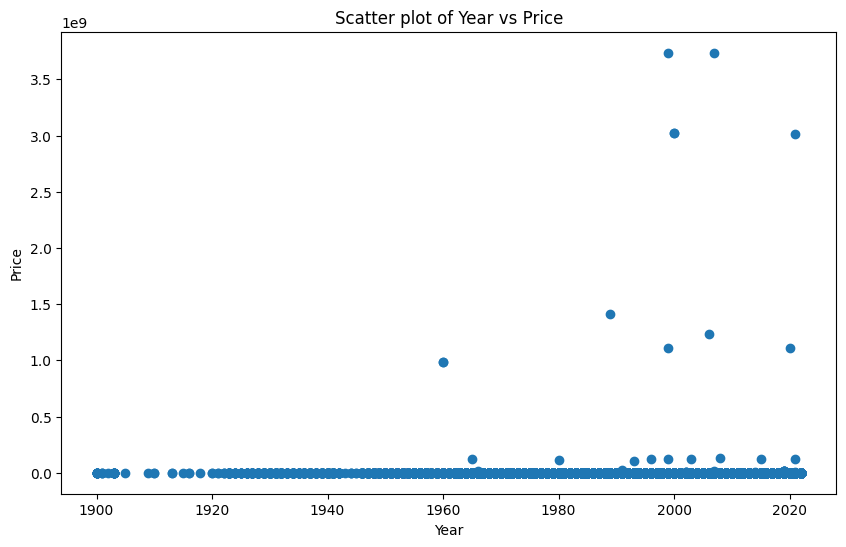

In [257]:
# Let's try some plots before Data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price')
plt.show()

In [287]:
cars.query('year < 1980 and title_status != "parts_only" and price > 20 and price < 100000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
249753,21,buick,skylark,1968.0
61352,23,NaN,oldsmobile cutlass,1972.0
368239,30,chevrolet,corvette,1956.0
286595,30,NaN,willys,1923.0
381707,30,gmc,NaN,1937.0
...,...,...,...,...
42375,99500,lincoln,model l roadster,1929.0
53869,99888,ford,sedan,1940.0
60929,99888,ford,sedan,1940.0
60538,99900,chevrolet,corvette,1954.0


In [205]:
cars.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)

price       1.000000
year        0.347812
id         -0.076019
odometer   -0.177927
Name: price, dtype: float64

## Ok at this point, after exploration it's time to do some data cleaning.

In [ ]:
# Drop rows where 'model' is NaN
cars = cars.dropna(subset=['model'])

# Drop rows where 'manufacturer' is NaN
cars = cars.dropna(subset=['manufacturer'])

# Let's clean up undesirable title status
remove_title_status = ['salvage', 'parts_only', 'lien', 'missing','rebuilt']
cars = cars[~cars['title_status'].isin(remove_title_status)]

# Let's remove entries that are parts only.
cars = cars[cars['title_status'] != 'parts_only']

# Let's drop older cars that may be less desirable to customers and could be priced lower than their market value. Also may require more maintenance, repairs, missing safety features, not as fuel efficient and cost money to store on the lot. Let's drop cars that over 30 years old.
cars = cars[cars['year'] >= 1995]

# Price to keep on the lot. Let's drop cars that are priced less than $600, that's $50/month in expenses (at least) to keep and store on the lot. 
cars = cars[cars['price'] >= 600]

# Let's get rid of cars that are priced over $120,000, as they may be outliers and skewing the data. Also may not be desirable to customers and could be priced higher than their market value.
# Anything over $120,000 is likely a luxury or exotic car,which we can analyze separately if we want to.  
cars = cars[cars['price'] <= 120000]

# Let's drop recors there manufacturer is Harley-Davidson, as they are motorcycles.  The idea is that luxury cars, motorcyles, have different features and the dealership is specialized in these areas.
cars = cars[cars['manufacturer'] != 'harley-davidson']

# Let's drop cars that have an odometer reading over 250,000 miles, as they may be less desirable to customers and could be priced lower than their market value. After 250,000. It may be time to replace the motor.
cars = cars[cars['odometer'] <= 250000]

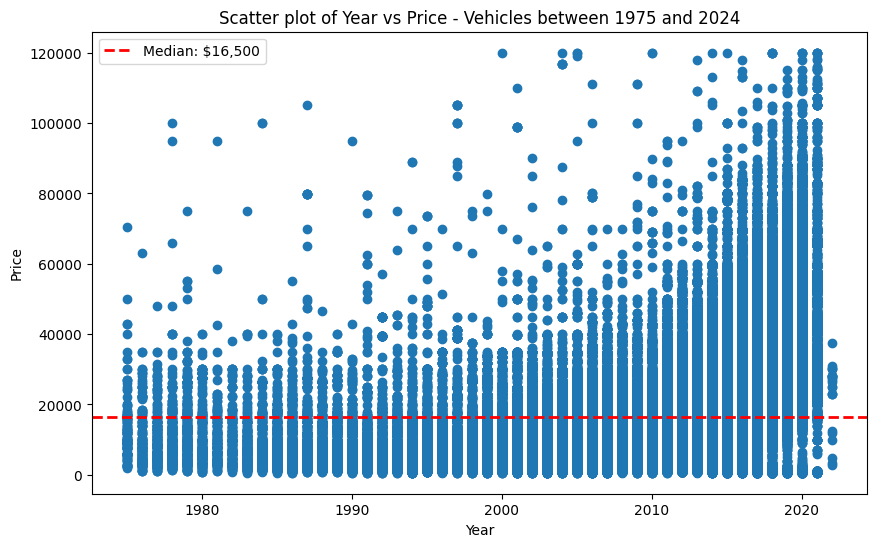

In [383]:
# Let's try to plot again after some data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
median_price = cars['price'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price - Vehicles between 1975 and 2024')
plt.axhline(y=median_price, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
plt.legend()
plt.savefig('images/cleaned_year_price_1975_2024.png')
plt.show()

It seems to tail off in the 90s, so adjusting the year to 1995 and then replotting.

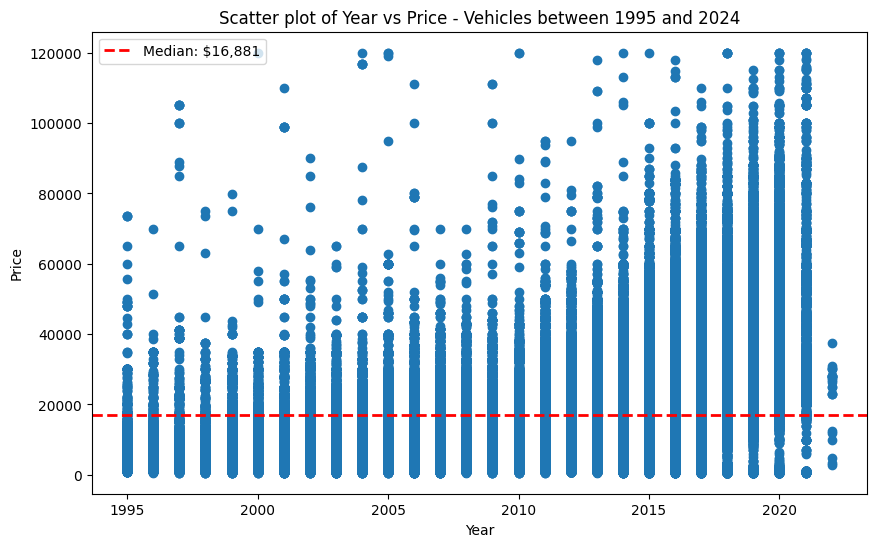

In [386]:
# Let's try to plot again after some data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
median_price = cars['price'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price - Vehicles between 1995 and 2024')
plt.axhline(y=median_price, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
plt.legend()
plt.savefig('images/cleaned_year__price_1995_2024.png')
plt.show()

Ok let's look at price to mileage(odometer). 

In [339]:
# Let's check the odometer values of our current dataset
cars['odometer'].describe()
#cars.query('odometer > 250000')[['price','manufacturer','model','year','odometer']].sort_values('odometer')

count    333369.000000
mean      90430.281136
std       59329.027746
min           0.000000
25%       37561.000000
50%       86996.000000
75%      134000.000000
max      250000.000000
Name: odometer, dtype: float64

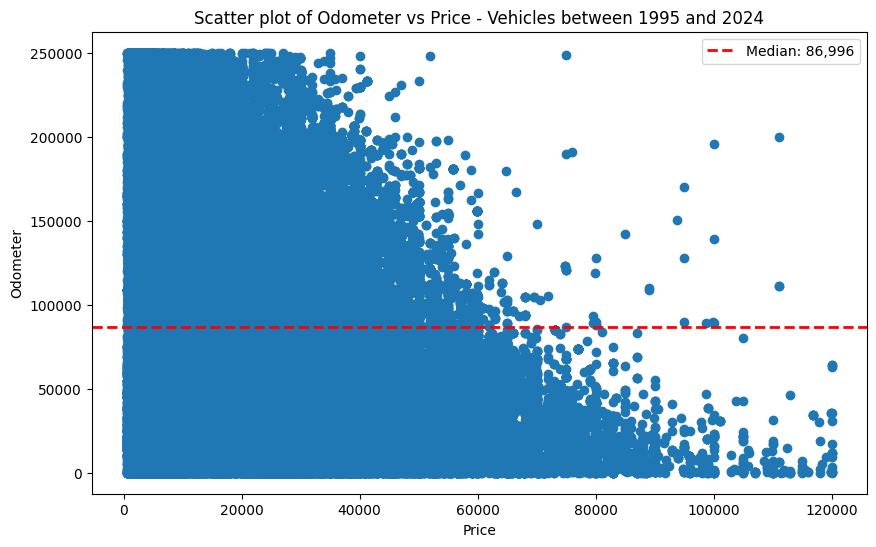

In [349]:
median_mileage = cars['odometer'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['price'], cars['odometer'])
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Scatter plot of Odometer vs Price - Vehicles between 1995 and 2024')
plt.axhline(y=median_mileage, color='red', linestyle='--', linewidth=2, label=f'Median: {median_mileage:,.0f}')
plt.legend()
plt.savefig('images/odometer_price_scatter.png')
plt.show()

In [363]:
cars_numeric = cars.copy()
cars_numeric = cars_numeric[(cars_numeric['price'] != 0) & (cars_numeric['price'] != 1)]
cars_numeric = cars_numeric[(cars_numeric['price'] < 100000)]
cars_numeric['price'].value_counts().sort_values()  

bins = np.arange(0, cars_numeric['price'].max() + 5000, 5000)
cars_numeric['bins'] = pd.cut(cars_numeric['price'], bins=bins)

cars_numeric = cars_numeric[cars_numeric['cylinders'] != 'other']
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
title_status_mapping = {
    'clean': 5,
    'salvage': 4,
    'rebuilt': 3,
    'lien': 2,
    'missing': 1,
    'parts only': 0
}
size_mapping = {
    'full-size': 3,
    'mid-size': 2,
    'compact':  1,
    'sub-compact': 0
}
fuel_mapping = {
    'gas': 3,
    'diesel': 2,
    'electric': 1,
    'hybrid': 0
}
cylinders_mapping = {
    '12 cylinders': 6,
    '10 cylinders': 5,
    '8 cylinders': 4,
    '6 cylinders': 3,
    '5 cylinders': 2,
    '4 cylinders': 1,
    '3 cylinders': 0
}
drive_mapping = {
    '4wd': 2,
    'rwd': 1,
    'fwd': 0
}
cars_numeric['bin_index'] = cars_numeric.groupby('bins', observed=True).cumcount()+1

cars_numeric['condition'] = cars_numeric['condition'].map(condition_mapping)
cars_numeric['title_status'] = cars_numeric['title_status'].map(title_status_mapping)    
cars_numeric['size'] = cars_numeric['size'].map(size_mapping)
cars_numeric['fuel'] = cars_numeric['fuel'].map(fuel_mapping)
cars_numeric['cylinders'] = cars_numeric['cylinders'].map(cylinders_mapping)
cars_numeric['drive'] = cars_numeric['drive'].map(drive_mapping)
cars_numeric = cars_numeric.select_dtypes(include=np.number)

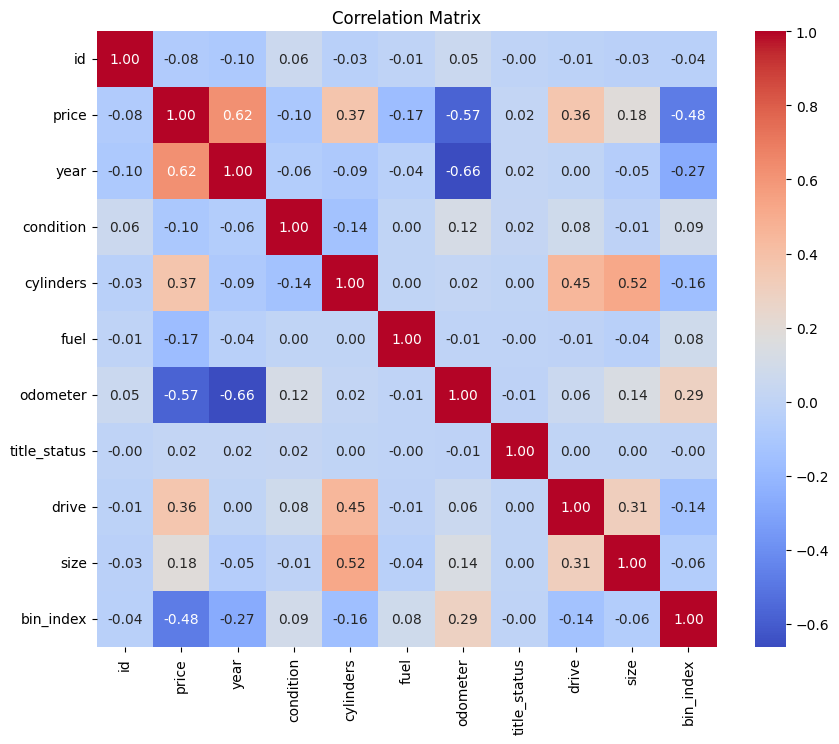

In [ ]:
# Correlation matrix naive approach
corr = cars_numeric.corr()

    
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix_cleaned.png')
plt.show()

In [184]:
cars = cars[(cars['price'] != 0) & (cars['price'] != 1)]
cars = cars[(cars['price'] < 100000)]
cars['price'].value_counts().sort_values()  

bins = np.arange(0, cars['price'].max() + 5000, 5000)
cars['bins'] = pd.cut(cars['price'], bins=bins)
#cars.query('price > 0').plot(kind='scatter', x='year', y='price')

#cars.info()

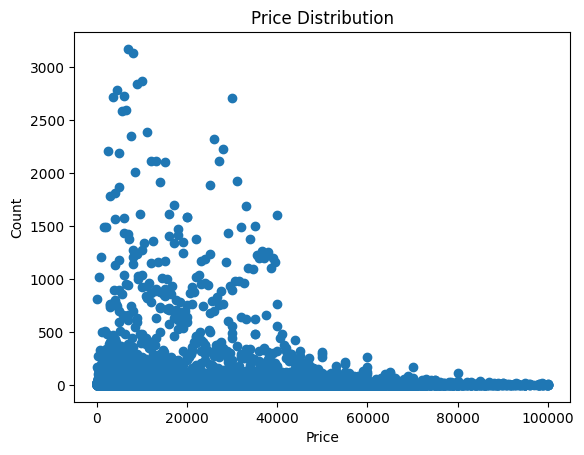

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state            bins  
0  NaN  NaN         NaN    az   (5000, 10000]  
1 

In [191]:
plt.Figure(figsize=(10, 8))
price_counts = cars['price'].value_counts().sort_values()
#price_counts = cars['bins'].value_counts().sort_values()
plt.scatter(price_counts.index, price_counts.values)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()
print(cars.head())
print(type(cars['bins']))


In [193]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391337 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            391337 non-null  int64   
 1   region        391337 non-null  object  
 2   price         391337 non-null  int64   
 3   year          390166 non-null  float64 
 4   manufacturer  375609 non-null  object  
 5   model         386787 non-null  object  
 6   condition     241039 non-null  object  
 7   cylinders     231967 non-null  object  
 8   fuel          388747 non-null  object  
 9   odometer      389057 non-null  float64 
 10  title_status  383604 non-null  object  
 11  transmission  389523 non-null  object  
 12  VIN           240655 non-null  object  
 13  drive         272208 non-null  object  
 14  size          109882 non-null  object  
 15  type          306462 non-null  object  
 16  paint_color   275365 non-null  object  
 17  state         391337 non-null  obj

In [219]:
cars['paint_color'].value_counts()

paint_color
white     72404
black     58206
silver    39870
blue      29334
red       28741
grey      22679
green      7039
custom     6389
brown      6175
yellow     2011
orange     1843
purple      674
Name: count, dtype: int64

In [218]:
cars.query('title_status == "parts only"').sort_values('price')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,bins
169822,7307295335,wichita,5,2008.0,dodge,durango,salvage,NaN,gas,180000.0,parts only,automatic,NaN,NaN,NaN,NaN,NaN,ks,"(0, 5000]"
301684,7315185027,toledo,10,2021.0,NaN,any and all,NaN,NaN,other,10.0,parts only,other,NaN,NaN,NaN,NaN,NaN,oh,"(0, 5000]"
199941,7302569334,flint,25,2021.0,NaN,0,good,other,other,240000.0,parts only,other,NaN,rwd,full-size,SUV,blue,mi,"(0, 5000]"
183832,7303577359,baltimore,100,1901.0,NaN,rolls royce phantom,NaN,NaN,electric,1000.0,parts only,manual,NaN,NaN,NaN,NaN,NaN,md,"(0, 5000]"
156789,7314968063,des moines,100,2008.0,chevrolet,trailblazer,NaN,NaN,other,111111.0,parts only,other,NaN,NaN,NaN,NaN,NaN,ia,"(0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24499,7309935529,chico,18000,1999.0,NaN,am general humvee,fair,8 cylinders,diesel,26000.0,parts only,automatic,NaN,4wd,NaN,NaN,NaN,ca,"(15000, 20000]"
292684,7314612930,cleveland,20000,1999.0,NaN,Rolls Royce Silver Seraph,good,12 cylinders,gas,30194.0,parts only,automatic,SCALA61E9XCX02227,rwd,full-size,sedan,blue,oh,"(15000, 20000]"
61328,7316601012,SF bay area,27000,2017.0,mercedes-benz,c300,excellent,4 cylinders,gas,53000.0,parts only,automatic,NaN,rwd,NaN,NaN,white,ca,"(25000, 30000]"
116840,7316291472,tampa bay area,32500,1932.0,ford,roadster,new,8 cylinders,gas,50.0,parts only,manual,NaN,fwd,mid-size,coupe,silver,fl,"(30000, 35000]"


In [186]:
price_dist = cars['bins'].value_counts().sort_index()
print(price_dist)

bins
(0, 5000]          62334
(5000, 10000]      79057
(10000, 15000]     53711
(15000, 20000]     48580
(20000, 25000]     34841
(25000, 30000]     34716
(30000, 35000]     26585
(35000, 40000]     23206
(40000, 45000]      9547
(45000, 50000]      6521
(50000, 55000]      3795
(55000, 60000]      2875
(60000, 65000]      1603
(65000, 70000]      1528
(70000, 75000]       838
(75000, 80000]       670
(80000, 85000]       395
(85000, 90000]       290
(90000, 95000]       127
(95000, 100000]      118
Name: count, dtype: int64


In [ ]:
bin_map = {pd.Interval(left=0, right=5000, closed='right'): 2500,

In [ ]:
cars['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [ ]:
# lets see what the transmission column looks like
cars.query('transmission == "other"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [73]:
cars['price'].value_counts().sort_values()

price
17873        1
26873        1
15375        1
27109        1
17868        1
         ...  
8995      2837
9995      2867
7995      3129
6995      3169
0        32895
Name: count, Length: 15655, dtype: int64

In [10]:
cars['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [51]:
cars['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [6]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


KeyError: "None of [Index([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,\n       ...\n       2020.0, 2018.0, 2020.0, 2018.0, 2018.0, 2019.0, 2020.0, 2020.0, 2018.0,\n       2019.0],\n      dtype='float64', length=426880)] are in the [columns]"

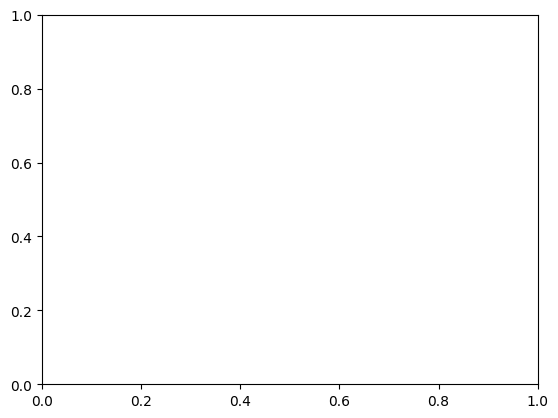

In [24]:
cars['year'] = cars['year'].dropna().astype(int)
cars.plot(kind='scatter', x=cars['year'], y=cars['price'])